In [13]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable


In [33]:
import cv2
import matplotlib.pyplot as plt

In [34]:
pip show opencv-python


Name: opencv-python
Version: 4.10.0.84
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages
Requires: numpy, numpy, numpy, numpy, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [36]:
config_file=" C:\\Users\Lenovo\Akshay python\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model=" C:\\Users\Lenovo\Akshay python\frozen_inference_graph.pb"

In [65]:
import cv2
import os

# Define paths (adjust them as needed)
config_file = r"C:\Users\Lenovo\Akshay python\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = r"C:\Users\Lenovo\Akshay python\frozen_inference_graph.pb"

# Load the model
try:
    model = cv2.dnn_DetectionModel(frozen_model, config_file)
    print("Model loaded successfully.")
except cv2.error as e:
    print(f"OpenCV error while loading model: {e}")
except Exception as e:
    print(f"Unexpected error while loading model: {e}")



Model loaded successfully.


In [66]:
classLabels=[]
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels= fpt.read().rstrip('\n').split('\n')

In [67]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [68]:
print(len(classLabels))

80


In [137]:
model.setInputSize(390,390)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001DA381C75F0>

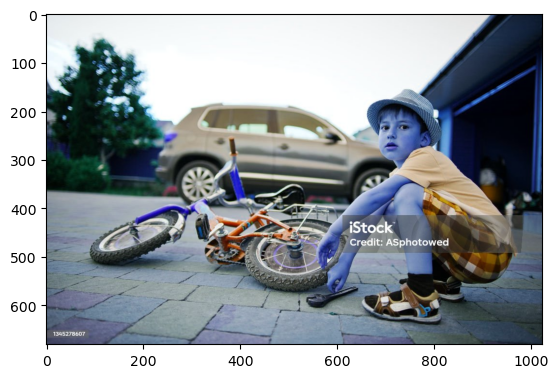

In [138]:
img=cv2.imread('boy.jpg')
plt.imshow(img)

In [139]:
ClassIndex, confidence, bbox=model.detect(img , confThreshold =0.5)

In [140]:
print(ClassIndex)

[3 4 1 1]


In [141]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(), bbox):
    cv2.rectangle(img, boxes,(255,0,0),2 )
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0] +10, boxes[1] +40), font, fontScale = font_scale,color=(0,255,0), thickness=3)

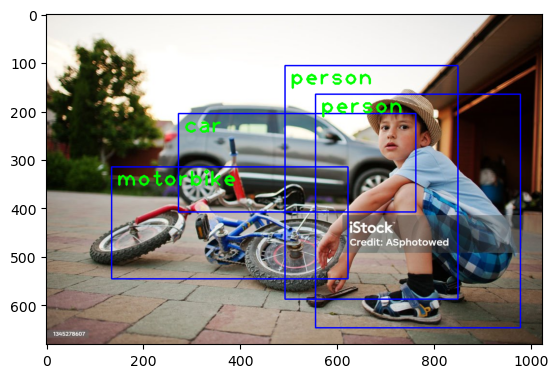

In [142]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))